In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_df, mouse_df,how="left", on=["Mouse ID"] )

#Selecting the 4 drugs we will analyze
combined_df = combined_df[(combined_df["Drug"] == 'Capomulin') |
                          (combined_df["Drug"] == 'Infubinol') |
                          (combined_df["Drug"] == 'Ketapril')  |
                          (combined_df["Drug"] == 'Placebo')   ]


# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
DT = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
DT = DT.reset_index()
# Preview DataFrame
DT.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
standard_errors = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
standard_errors = standard_errors.reset_index()
standard_errors.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
DT2 = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
DT2 = DT2.unstack(level = 0)
DT2_se = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
DT2_se = DT2_se.unstack(level = 0)
DT2.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


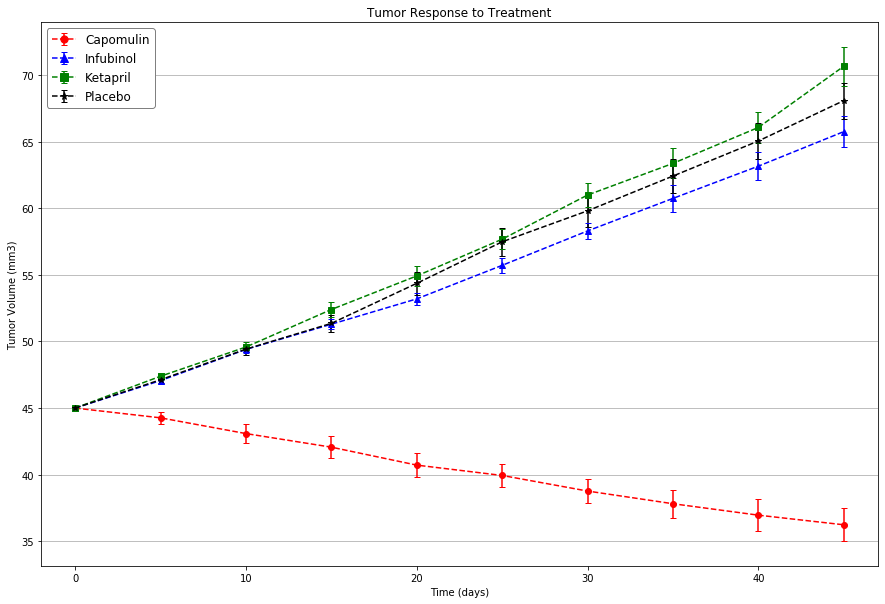

In [6]:
# Generate the Plot (with Error Bars)
Time = DT["Timepoint"].unique()

plt.figure(figsize = (15,10))
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-2,47)
plt.grid(axis='y')

markers = ['o', '^', 's', '*']
colors = ["red", "blue", "green", "black"]


# for loop for the chart
count = 0

for col in DT2.columns:
    plt.errorbar(Time, 
                 DT2[col], 
                 DT2_se[col], 
                 linestyle = '--', 
                 marker =  markers[count],
                 color = colors[count],
                 capthick = 1, #for caps on error bars 
                 capsize = 3)  # for caps on error bars
    count += 1

    
#Formatting the legend 

labels = DT2.columns.values
plt.legend(labels, 
           loc="upper left",
           frameon = True, 
           markerscale = 1.2, 
           edgecolor = 'gray', 
           fontsize = '12', 
           framealpha = 1)


# Save the Figure
plt.savefig("../Images/Tumor_response_to_treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
DT3 = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
DT3 = pd.DataFrame(DT3) 
# Preview DataFrame
DT3.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
DT3_se = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
DT3_se = pd.DataFrame(DT3_se)
# Preview DataFrame
DT3_se.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

DT3 = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
DT3 = DT3.unstack(level = 0)

DT3_se = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
DT3_se = DT3_se.unstack(level = 0)
print(DT3)
print("")
print(DT3_se)

Drug       Capomulin  Infubinol  Ketapril   Placebo
Timepoint                                          
0           0.000000   0.000000  0.000000  0.000000
5           0.160000   0.280000  0.304348  0.375000
10          0.320000   0.666667  0.590909  0.833333
15          0.375000   0.904762  0.842105  1.250000
20          0.652174   1.050000  1.210526  1.526316
25          0.818182   1.277778  1.631579  1.941176
30          1.090909   1.588235  2.055556  2.266667
35          1.181818   1.666667  2.294118  2.642857
40          1.380952   2.100000  2.733333  3.166667
45          1.476190   2.111111  3.363636  3.272727

Drug       Capomulin  Infubinol  Ketapril   Placebo
Timepoint                                          
0           0.000000   0.000000  0.000000  0.000000
5           0.074833   0.091652  0.098100  0.100947
10          0.125433   0.159364  0.142018  0.115261
15          0.132048   0.194015  0.191381  0.190221
20          0.161621   0.234801  0.236680  0.234064
25         

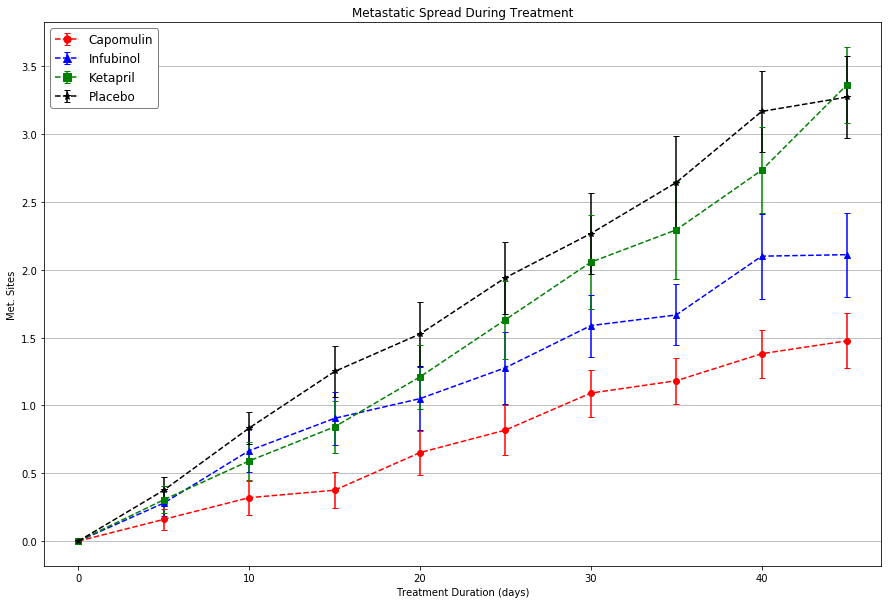

In [10]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Met. Sites")
plt.xlim(-2,47)
plt.grid(axis='y')

markers = ['o', '^', 's', '*']
colors = ["red", "blue", "green", "black"]


#creates plot for each treatment, using different markers for each

count = 0 

for col2 in DT3:
    plt.errorbar(Time, 
                 DT3[col2], 
                 DT3_se[col2], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 color = colors[count],
                 capthick = 1, 
                 capsize = 3)
    count += 1

#Formatting the legend 
labels = DT3.columns.values
plt.legend(labels, 
           loc="upper left",
           frameon = True, 
           markerscale = 1.2, 
           edgecolor = 'gray', 
           fontsize = '12', 
           framealpha = 1)

# Save the Figure
plt.savefig("../Images/Metastatic_spread_during_treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
SR = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
SR = SR.reset_index()
SR.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
SR = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
SR = SR.unstack(level = 0)
SR.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


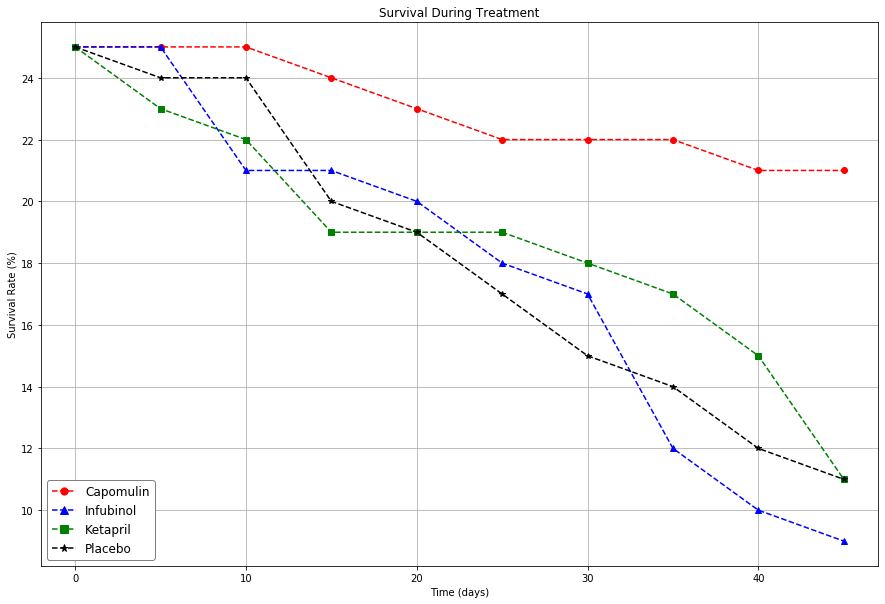

In [13]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (15,10))
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.xlim(-2,47)
plt.grid()

markers = ['o', '^', 's', '*']
colors = ["red", "blue", "green", "black"]

#creates plot for each treatment, using different markers for each

count = 0 

for col_sr in SR:
    plt.errorbar(Time, 
                 SR[col_sr], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 color = colors[count],
                 capthick = 1, 
                 capsize = 3)
    count += 1

#Formatting the legend 
labels = SR.columns.values
plt.legend(labels, 
           loc="lower left",
           frameon = True, 
           markerscale = 1.2, 
           edgecolor = 'gray', 
           fontsize = '12', 
           framealpha = 1)

# Save the Figure
plt.savefig("../Images/Survival_during_treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
Perc_chg = (DT2.loc[45,:] - DT2.loc[0,:])/ DT2.loc[0,:] *100
# Display the data to confirm
Perc_chg.head()

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

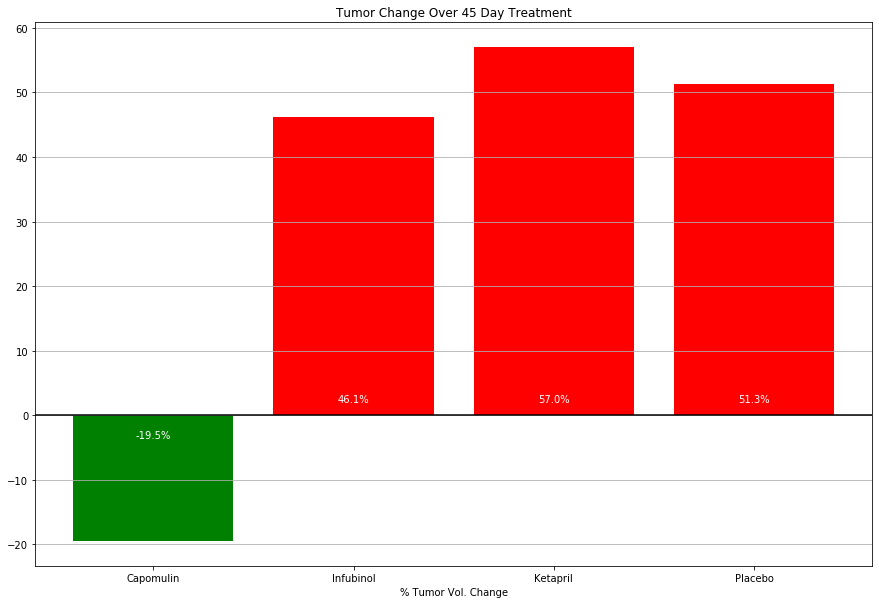

In [15]:
# Store all Relevant Percent Changes into a Tuple
RPC = []
for value in Perc_chg:
    RPC.append(value)

# Formatting Plot frame
plt.figure(figsize = (15,10))
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("% Tumor Vol. Change")
plt.axhline(y=0, color = 'black') # bold line for Y = zero
plt.grid(axis='y')
xlabels = Perc_chg.index

# Use functions to label the percentages of changes
plt.xticks(np.arange(len(xlabels)), xlabels)

# Splice the data between passing and failing drugs
plt.bar(np.arange(4), 
        RPC, 
        color = ['red' if RPC[x] > 0 else 'green' for x in range(4)]
        )

count = 0

# Loop to position the + and - values in the chart
for r in RPC:
    if r < 0:
        y_val = -3.5
    else:
        y_val = 2
    plt.text(count, y_val, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1
    
    
# Save the Figure
plt.savefig("../Images/Tumor Change Over 45 Day Treatment.png")


# Show the Figure
plt.show()